In [1]:
#Data Upload--------------------------------
import pandas as pd
col_names = ['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min','Rain','cDay','Rain1','Rain2','Rain3','Rain4','Rain5']
prain=pd.read_csv("D:/data/tan/train.csv",header=None,names=col_names)

In [2]:
# Data View-1-----------------------------------
prain.head()

,Frost_pt,Temp_MAX,Temp_MIN,Specific_Hum,Relative_Hum,Winds_Max,Winds_Min,Rain,cDay,Rain1,Rain2,Rain3,Rain4,Rain5
0,0.40,19.01,7.75,4.03,46.31,1.68,0.44,0,10001,0,1,0,0,0
1,0.89,20.65,8.19,4.21,43.44,1.91,0.69,0,10002,1,0,0,0,0
2,1.78,21.88,9.58,4.58,46.19,3.71,0.72,1,10003,0,0,0,0,0
3,5.84,21.40,7.73,5.92,64.12,4.48,1.26,0,10004,0,0,0,0,0
4,3.69,19.09,5.12,5.13,62.69,2.29,0.28,0,10005,0,0,0,0,0


In [3]:
# Data View-2-----------------------------------
prain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Frost_pt      4383 non-null   float64
 1   Temp_MAX      4383 non-null   float64
 2   Temp_MIN      4383 non-null   float64
 3   Specific_Hum  4383 non-null   float64
 4   Relative_Hum  4383 non-null   float64
 5   Winds_Max     4383 non-null   float64
 6   Winds_Min     4383 non-null   float64
 7   Rain          4383 non-null   int64  
 8   cDay          4383 non-null   int64  
 9   Rain1         4383 non-null   int64  
 10  Rain2         4383 non-null   int64  
 11  Rain3         4383 non-null   int64  
 12  Rain4         4383 non-null   int64  
 13  Rain5         4383 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 479.5 KB


In [4]:
feature_cols=['Frost_pt','Temp_MAX','Temp_MIN','Specific_Hum','Relative_Hum','Winds_Max','Winds_Min']
x=prain[feature_cols]
y0=prain.Rain
y1=prain.Rain1
y2=prain.Rain2
y3=prain.Rain3
y4=prain.Rain4
y5=prain.Rain5

In [5]:
#Data Processing--------------------------------------
from sklearn.model_selection import train_test_split
X = x #df.drop('rain', axis=1)
y1 = prain['Rain1']
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.33, random_state=200)

In [6]:
# Model Building and Training----------------------
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y1_train);

In [7]:
#Model Evaluation---------------------------------

from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report,)
y1_pred = model.predict(X_test)

accuray = accuracy_score(y1_pred, y1_test)
f1 = f1_score(y1_pred, y1_test, average="weighted")

print("Accuracy:", accuray)
print("F1 Score:", f1)

Accuracy: 0.7878369039391845
F1 Score: 0.7879670281875015


Text(0.5, 1.0, 'Naive-bayes (Model-NV-1)')

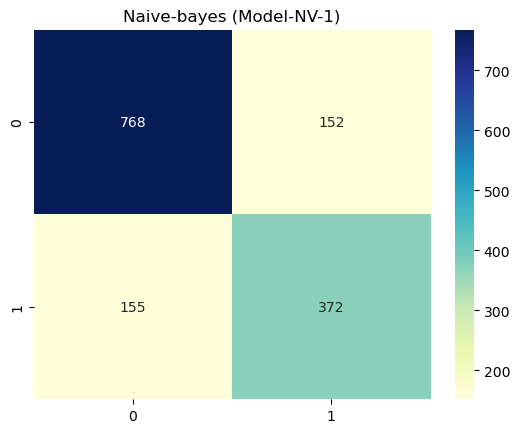

In [8]:
# Labels check karne hai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
labels = ["Rain", "Not Rain"]
cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(pd.DataFrame(cm),annot=True,cmap="YlGnBu",fmt='g')
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#disp.plot();
plt.title('Naive-bayes (Model-NV-1)')
#

In [9]:
#pip install matplotlib

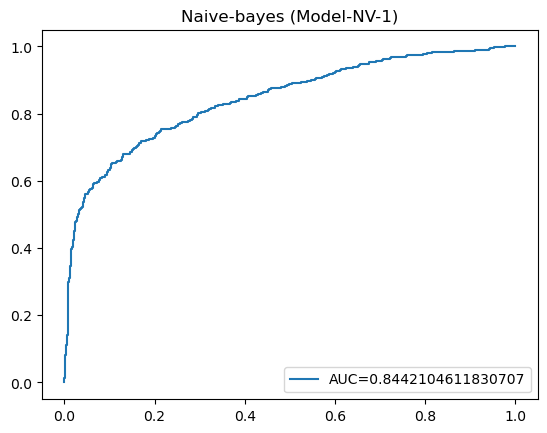

In [10]:

import matplotlib.pyplot as plt

from sklearn import metrics
y1_pred_proba=model.predict_proba(X_test)[::,1]
fpr,tpr,_=metrics.roc_curve(y1_test,y1_pred_proba)
auc=metrics.roc_auc_score(y1_test,y1_pred_proba)
#plt.plot(fpr,tpr,label="data 1,auc="+str(auc))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Naive-bayes (Model-NV-1)')
plt.legend(loc=4)
plt.show()

In [11]:
#Jan
import numpy as np
pr=pd.read_csv("D:/data/tan/i01J.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        1          0
4        1          0
5        0          0
6        1          0
7        1          0
8        1          0
9        1          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       1          0
19       0          0
20       1          0
21       1          0
22       1          0
23       1          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [12]:
#Feb
import numpy as np
pr=pd.read_csv("D:/data/tan/i02F.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        1          0
2        1          0
3        0          0
4        0          0
5        0          0
6        1          0
7        1          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       1          0
25       0          0
26       0          0
27       0          0


In [13]:
#Mar
import numpy as np
pr=pd.read_csv("D:/data/tan/i03M.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          1
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0


In [14]:
#Apr
import numpy as np
pr=pd.read_csv("D:/data/tan/i04A.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0


In [15]:
#May
import numpy as np
pr=pd.read_csv("D:/data/tan/i05M.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        1          0
3        1          0
4        0          0
5        0          0
6        1          0
7        1          0
8        1          0
9        1          1
10       1          1
11       1          1
12       0          0
13       0          0
14       0          0
15       1          0
16       0          0
17       0          0
18       1          0
19       1          0
20       1          0
21       1          0
22       1          0
23       0          1
24       0          0
25       0          0
26       1          0
27       1          1
28       0          1
29       0          0
30       0          0


In [16]:
#June
import numpy as np
pr=pd.read_csv("D:/data/tan/i06J.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       1          0
11       0          0
12       0          0
13       0          0
14       1          0
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       0          1
21       1          0
22       0          0
23       0          0
24       1          0
25       1          1
26       1          1
27       1          1
28       1          1
29       1          1


In [17]:
#July
import numpy as np
pr=pd.read_csv("D:/data/tan/i07J.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        1          1
2        0          1
3        1          1
4        1          1
5        0          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       0          1
14       1          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       1          1
27       1          1
28       1          1
29       1          1
30       1          1


In [18]:
#Aug
import numpy as np
pr=pd.read_csv("D:/data/tan/i08A.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        1          1
2        1          1
3        1          1
4        0          1
5        1          1
6        0          1
7        0          1
8        1          1
9        1          1
10       0          1
11       0          1
12       1          1
13       1          1
14       0          1
15       0          1
16       0          1
17       1          1
18       1          1
19       0          1
20       1          1
21       1          1
22       1          1
23       1          1
24       0          1
25       0          1
26       1          1
27       1          1
28       1          1
29       0          1
30       1          1


In [19]:
#sep
import numpy as np
pr=pd.read_csv("D:/data/tan/i09S.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        0          1
2        0          1
3        0          1
4        0          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       1          1
12       1          1
13       1          1
14       1          1
15       1          1
16       1          1
17       1          1
18       1          1
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       0          1
26       0          1
27       0          1
28       0          1
29       1          1


In [20]:
#OCT
import numpy as np
pr=pd.read_csv("D:/data/tan/i10O.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        1          1
1        0          1
2        0          1
3        1          1
4        1          1
5        1          1
6        1          1
7        1          1
8        1          1
9        1          1
10       1          1
11       0          1
12       0          1
13       0          1
14       0          1
15       0          1
16       0          1
17       0          1
18       0          1
19       0          1
20       0          1
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          1
28       0          0
29       0          0
30       0          0


In [21]:
#Nov
import numpy as np
pr=pd.read_csv("D:/data/tan/i11N.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          1
2        0          1
3        0          1
4        0          1
5        0          1
6        0          1
7        0          1
8        0          1
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0


In [22]:
#Dec
import numpy as np
pr=pd.read_csv("D:/data/tan/i12D.csv",header=None,names=col_names)
X_new1=pr[feature_cols]
y1_pred1=model.predict(X_new1)

d={
'Actual':pr.Rain1,
'Predicted':y1_pred1}

df1 = pd.DataFrame(d)
print(df1)

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        0          0
10       0          0
11       0          0
12       0          0
13       0          0
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       0          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       0          0
28       0          0
29       0          0
30       0          0
